In [3]:
import torch
import cv2
import numpy as np
from PIL import Image

class PseudoLabelGenerator():
	def __init__(self,flow_format='sequential', optimization='simple', confidence='linear', seq_length=5):
		"""				
		flow_format :  
			'centering':  flow is calculated form frame i to N
			'sequential': flow is calculated from frame i -> i+1

		confidence:
			'equal': perfect optical flow -> all project labels are equally good
			'linear': linear rate -> per frame
			'exponential': exponential rate -> per frame 
		"""
		self._confidence_values = self._get_confidence_values( seq_length, confidence) 
		self._flow_format = flow_format

	


	def input(self, segmentations, flows, depths):
		"""
		segmentations: list( Tensors CxHxW ) of len N  (either one hot encoded or softmax output)
		flows: list( Tensors CxHxW ) of len N-1 
		depths: list( Tensors CxHxW ) of len N

		"""		

		new_segmentations = self.project_segmentation_to_reference( segmentations, flows)



	def project_segmentation_to_reference(self, segmentations, flows):
		if self._flow_format == 'centering':
			results_seg = []
			for s,f in zip(segmentations, flows):
				undistorted_img = cv2.remap(img, map1, map2, interpolation=cv2.INTER_LINEAR, borderMode=cv2.BORDER_CONSTANT)
				display(Image.fromarray(undistorted_img))
				results_seg.append(res)

		else:
			raise Exception
		return new_segmentation 


	def _get_confidence_values(self, seq_length, confidence ):
		"""
		returns list of length seq_lengt with values
		"""
		if confidence == 'linear':
			ret = []
			lin_rate = 0.1
			s = 0
			for i in range(seq_length):
				res = 1 - lin_rate* (seq_length-i)
				if res < 0: 
					res = 0
				s += ret
				ret.append(res)
			return [r/s for r in ret]

		elif confidence == 'equal':
			return [1/float(seq_length)]*int(seq_length)		
		
		elif confidence == 'exponential':
			ret = []
			exp_rate = 0.8
			s = 0
			for i in range(seq_length):
				res = exp_rate**(seq_length-i)
				if res < 0: 
					res = 0
				s += ret
				ret.append(res)
			return [r/s for r in ret]
        

        
class SuperPixelImageGenerator():        
    def __init__(self,method='default'):
        pass
    
    def apply(self, image):
        # applys superpixel generation
        pass
        # returns superpixel encoding: All pixel with same ID belong to same super pixel
    
    def get_segmentation(superpixel, class_probs):
        # input is a superpixel encoding, pixelwise class probabilities
        pass
        # returns final prediction
        
        
        
# from skimage.data import astronaut
# from skimage.color import rgb2gray
# from skimage.filters import sobel
# from skimage.segmentation import felzenszwalb, slic, quickshift, watershed
# from skimage.segmentation import mark_boundaries
# from skimage.util import img_as_float

# img = img_as_float(astronaut()[::2, ::2])

# segments_fz = felzenszwalb(img, scale=100, sigma=0.5, min_size=50)
# segments_slic = slic(img, n_segments=250, compactness=10, sigma=1,
#                      start_label=1)
# segments_quick = quickshift(img, kernel_size=3, max_dist=6, ratio=0.5)
# gradient = sobel(rgb2gray(img))
# segments_watershed = watershed(gradient, markers=250, compactness=0.001)


IndentationError: expected an indented block (<ipython-input-3-d44ec8ca7b86>, line 91)

total  time  0.00870966911315918
Valid Flow


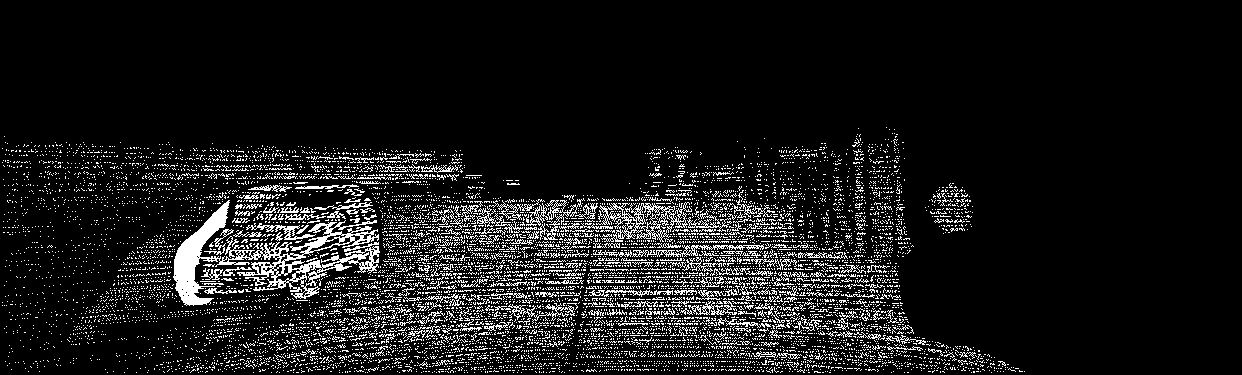

Valid Flow


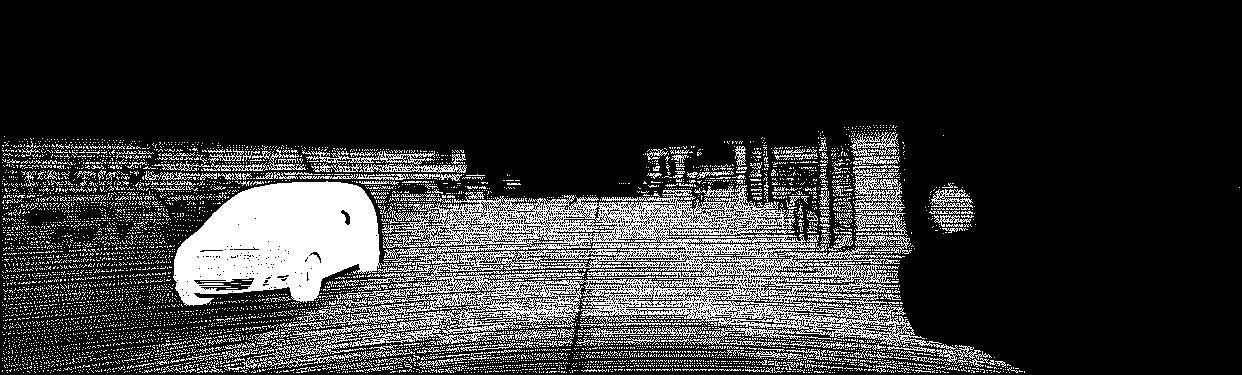

In [118]:
import imageio
import time

idx = "00"
img_1 =f"/home/jonfrey/datasets/kitti/training/image_2/0000{idx}_10.png"
img_2 =f"/home/jonfrey/datasets/kitti/training/image_2/0000{idx}_11.png"
gt_flow = f"/home/jonfrey/datasets/kitti/training/flow_occ/0000{idx}_10.png"
obj_map_p1 = f"/home/jonfrey/datasets/kitti/semantic_segmentation/training/semantic_rgb/0000{idx}_10.png"

obj_map_1 = imageio.imread(obj_map_p1)

img1 = imageio.imread(img_1)
img2 = imageio.imread(img_2)

def readFlowKITTI(filename):
    flow = cv2.imread(filename, cv2.IMREAD_ANYDEPTH|cv2.IMREAD_COLOR)
    flow = flow[:,:,::-1].astype(np.float32)
    flow, valid = flow[:, :, :2], flow[:, :, 2]
    flow = (flow - 2**15) / 64.0
    return flow, valid
flow, valid = readFlowKITTI(gt_flow)


st = time.time()
x_1 = np.arange( 0,flow.shape[1])[None,:].repeat(flow.shape[0], 0).astype(np.float32)
x_2 = np.arange( 0,flow.shape[0])[:,None].repeat(flow.shape[1], 1).astype(np.float32)
x_1[valid==1] -=  flow[:,:,0][valid==1]
x_2[valid==1] -=  flow[:,:,1][valid==1]
res1 = cv2.remap(img1, x_1, x_2, interpolation=cv2.INTER_LINEAR, borderMode=cv2.BORDER_CONSTANT)

obj_map_trafo = cv2.remap(obj_map_1, x_1, x_2, interpolation=cv2.INTER_NEAREST, borderMode=cv2.BORDER_CONSTANT)
print("total  time ", time.time()-st)

x_1 = np.arange( 0,flow.shape[1])[None,:].repeat(flow.shape[0], 0).astype(np.float32)
x_2 = np.arange( 0,flow.shape[0])[:,None].repeat(flow.shape[1], 1).astype(np.float32)

x_1 -= flow[:,:,0]
x_2 -= flow[:,:,1]
res2 = cv2.remap(img2, x_1, x_2, interpolation=cv2.INTER_LINEAR, borderMode=cv2.BORDER_CONSTANT)
valid2 = cv2.remap(valid, x_1, x_2, interpolation=cv2.INTER_NEAREST, borderMode=cv2.BORDER_CONSTANT)


# display( Image.fromarray( np.uint8(obj_map_1)) )
# display( Image.fromarray( np.uint8(obj_map_trafo))


print("Valid Flow")
m = valid2[:,:,None].repeat(3,2)
display( Image.fromarray(np.uint8(m*255)))

print("Valid Flow")
m = valid[:,:,None].repeat(3,2)
display( Image.fromarray(np.uint8(m*255)))

In [122]:
mge_obj = cv2.Map()

AttributeError: module 'cv2.cv2' has no attribute 'Map'

Image1


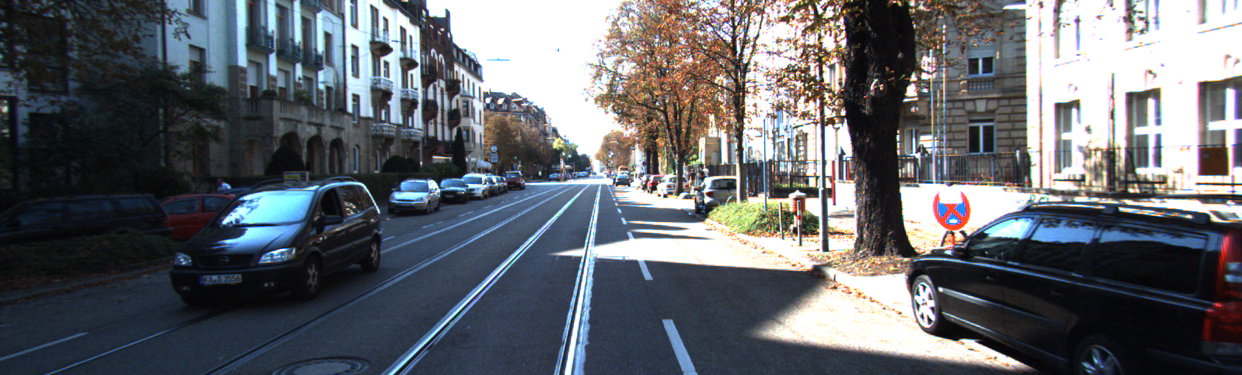

Image2


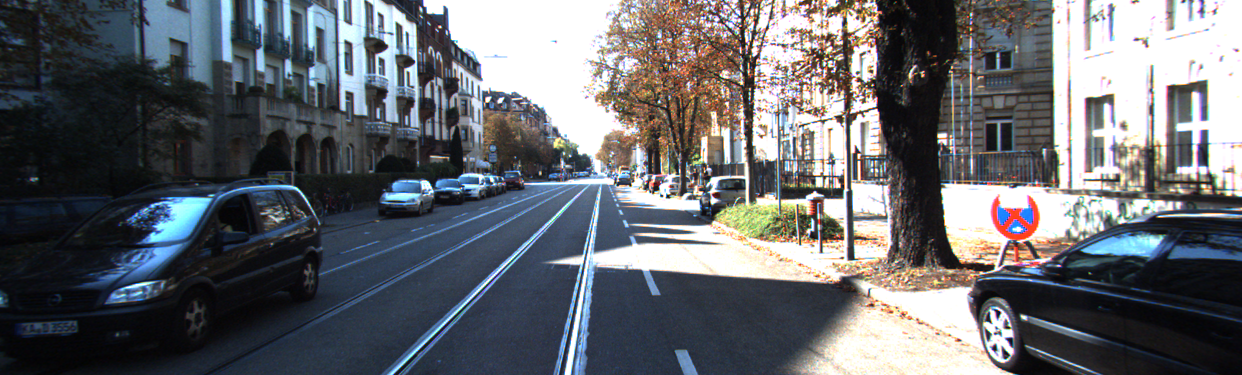

Image2 -> projected into frame of Image 1


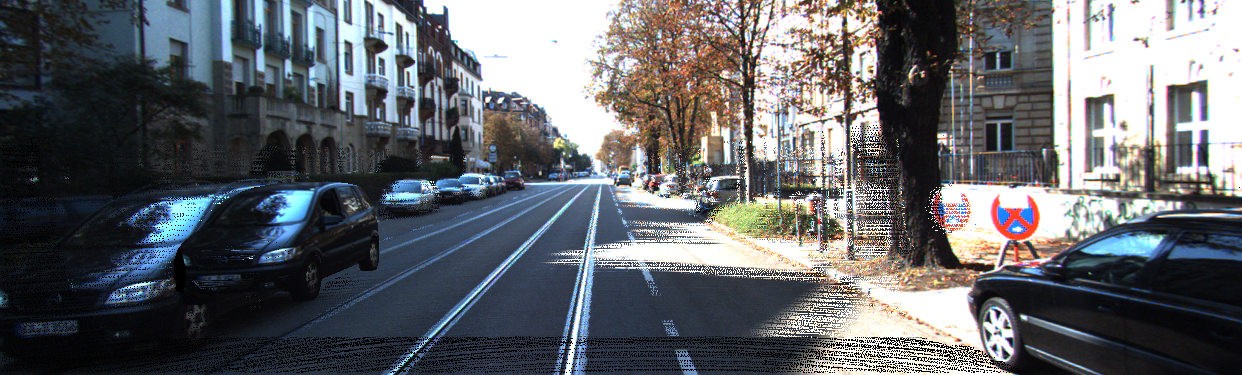

Image1 -> projected into frame of Image 


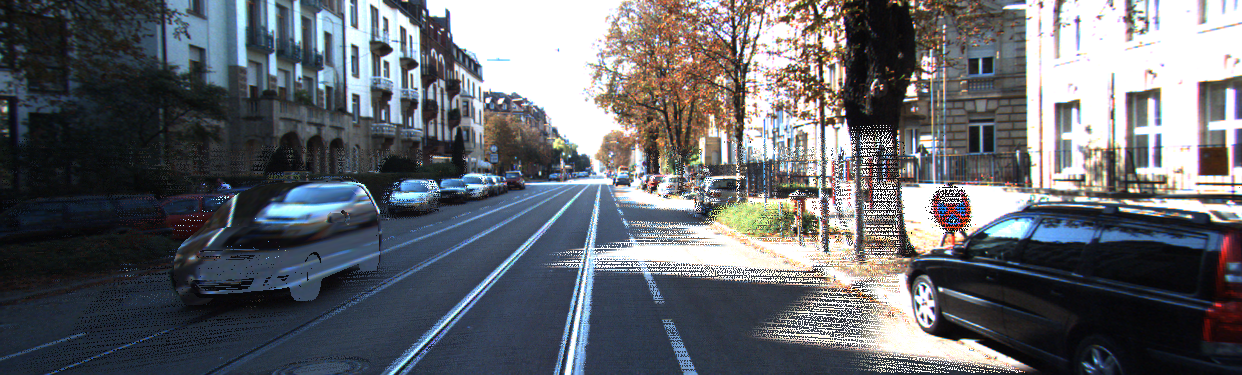

Valid Flow


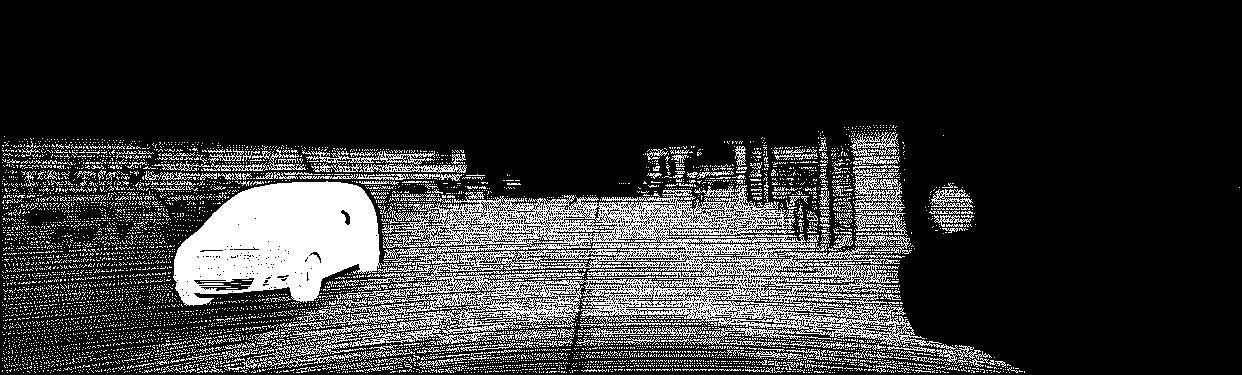

In [99]:
print ("Image1")
display( Image.fromarray(img1) )

print ("Image2")
display( Image.fromarray(img2) )

print("Image2 -> projected into frame of Image 1")
display( Image.fromarray(res2) )

print("Image1 -> projected into frame of Image ")
display( Image.fromarray(res1) )

print("Valid Flow")
m = valid[:,:,None].repeat(3,2)
display( Image.fromarray(np.uint8(m*255)))